# **NYC Car Accident Severity Prediction**
## **Adnan Arnaout, Matthew Grafals, Maria Varghese, Tyler Anatole**
### DSE I2100 - Applied Machine Learning

# **Abstract**

Motor vehicle accidents (MVAs) pose a significant threat to public safety and economic stability worldwide, especially in New York City. Rapid urbanization and increasing vehicular traffic have exacerbated the situation, leading to a pressing need for proactive measures. The proposed project aims to leverage machine learning (ML) to predict the severity of MVAs in New York City, thereby enabling timely deployment of emergency services and informing policy measures to enhance road safety.

# **Introduction**

Over 200,000 MVAs per year have occurred in NYC from 2013 to 2019, and over 100,000 MVA per year from 2020 to 2023, resulting in a total of 2,000,000+ MVAs since 2012. Figure below shows the MVAs trend since 2012.

![NYC Car Accident Severity Stats](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/stats-image.jpg?raw=true)

| **Total Number of Persons _Injured_** in a motor vehicle accident _since 2012_ | **Total Number of Persons _Killed_** in a motor vehicle accident _Since 2012_ |
|---------------------------------------------------------------------------------|--------------------------------------------------------------------------------|
| 640,058                                                                         | 3,084                                                                          |

In addition, the total number of persons injured in motor vehicle accidents since 2012 is 650,058 and total number of persons killed in a motor vehicle accident since 2012 is 3,084. Motor vehicle accidents pose a significant threat to public safety in NYC.


# **Background**

The aim of this project stems from the fact that fast responses to MVAs can significantly reduce the severity of outcomes. This project applies ML in a practical application, with the potential for tangible societal benefits, including reduced mortality rates and improved traffic management.


# **Data**

The dataset used in this study will be sourced from the Motor Vehicle Collisions - Crashes dataset provided by New York City's Open Data platform. This dataset offers comprehensive details on crash events, which include timestamps, geographical coordinates, numbers of injuries and fatalities, and collision types. Dataset can be found in this link: https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data


# **Methods**

The proposed methodology involves the development of a classification model. We plan to use algorithms like Logistic Regression, Support Vector Machines, Decision Trees, Random Forest, and Gradient Boosting due to their efficacy in handling tabular data. The approach will be twofold: First, to identify key features influencing accident severity; and second, to predict the severity level of new incidents. Feature engineering will be employed to derive new predictive variables from the raw data.
The experiments will involve:


1.   Data preprocessing to handle missing values and outliers.
2.   Exploratory data analysis to derive trends and insights from the data.
3.   Feature selection to determine which variables most significantly predict accident severity.
4.   Various model training.
5.   Performance comparison between different ML models..






# **Data Preprocessing**



1.   Compeletness of the data

As seen in the figure below, many features contain missing data. Some features have more than 90% missing data. Contributing Factor Vehicles 3 through 5 and Vehicle Type codes 3 through 5 being missing tells us that our dataset has more single and two-vehicle accidents reported than multi car accidents.

![Missing Data Plot](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/Missing-data.jpg?raw=true))

2.   Data cleaning and pre-processing
  
      **a. Initial dataset overview**

      The raw dataset comprises the following columns:

      >**Date and time of the crash:**
    
    >*(CRASH DATE, CRASH TIME)*
    
    >**Location details:**
    
    >*(BOROUGH, ZIP CODE, LATITUDE, LONGITUDE, LOCATION, ON STREET NAME, CROSS STREET NAME, OFF STREET NAME)*

   >**Injury and fatality counts:**

    >*(NUMBER OF PERSONS INJURED, NUMBER OF PERSONS KILLED, NUMBER OF PEDESTRIANS INJURED, NUMBER OF PEDESTRIANS KILLED, NUMBER OF CYCLIST INJURED, NUMBER OF CYCLIST KILLED, NUMBER OF MOTORIST INJURED, NUMBER OF MOTORIST KILLED)*

    >**Contributing factors and vehicle types:**

    >*(CONTRIBUTING FACTOR VEHICLE 1-5, VEHICLE TYPE CODE 1-5)*

    >**A unique identifier for each collision:**

    >*(COLLISION_ID)*

    **b. Data cleaning and pre-processing steps**

    The following steps were taken to clean and preprocess the dataset:

    >**i. Validating latitude and longitude**

    >To ensure that all geographical data points are within the boundaries of NYC, the dataset was filtered based on valid latitude and longitude ranges. The valid ranges are:

 >**Latitude:** 40.4774 to 40.9176;
>**Longitude:** -74.2591 to -73.7004

  >Values outside these ranges were considered invalid and replaced with NaN. This was done to maintain the integrity of location data, which is crucial for spatial analysis. This resulted in the removal of 4,367 invalid latitude and 4,489 invalid longitude values.

>![](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/Validating%20Latitude%20and%20Longitude%20Values.png?raw=true)

>>**ii. Verifying injury and fatality counts**

>The columns 'NUMBER OF PERSONS INJURED' and 'NUMBER OF PERSONS KILLED' should be the sum of their respective subcategories:

*   *‘NUMBER OF PERSONS INJURED’ = ‘NUMBER OF PEDESTRIANS INJURED’ + ‘NUMBER OF CYCLIST INJURED’ + ‘NUMBER OF MOTORIST INJURED’*

*   *‘NUMBER OF PERSONS KILLED’ = ‘NUMBER OF PEDESTRIANS KILLED’ + ‘NUMBER OF CYCLIST KILLED’ + ‘NUMBER OF MOTORIST KILLED’*

> We identified mismatched counts and corrected them by summing the detailed columns. This corrected 7,536 injury mismatches and 91 fatality mismatches.

>![](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/Verifying%20Injury%20and%20Fatality%20Counts.png?raw=true)

>**iii. Handling missing and redundant values**

>For columns ‘CONTRIBUTING FACTOR VEHICLE 2-5’ and ‘VEHICLE TYPE CODE 2-5’, missing values were replaced with placeholders ('No factor' and 'No vehicle') to retain the records and prevent loss of data. However, if the primary contributing factors or vehicle types (‘CONTRIBUTING FACTOR VEHICLE 1’, ‘VEHICLE TYPE CODE 1’) were missing, those rows were dropped as they indicate no vehicle involved, making the data irrelevant for our prediction model.

>![](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/Handling%20Missing%20and%20Redundant%20Values.png?raw=true)

>Columns that were redundant or not useful for the prediction task were removed. These included location details (BOROUGH, ZIP CODE, etc.) and detailed injury/fatality counts that had already been verified and summarized.

>![](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/Handling%20Missing%20and%20Redundant%20Values2.png?raw=true)

>Remaining rows with NaN values were dropped using the Pandas “dropna()” method:

>![](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/Handling%20Missing%20and%20Redundant%20Values3.png?raw=true)

>**iv. Reducing cardinality**

>To manage the high cardinality of the 'CONTRIBUTING FACTOR VEHICLE' and 'VEHICLE TYPE CODE' columns, we retained only the top 10 most frequent values and replaced the rest with 'Other'. This step helps in reducing the complexity and enhancing the performance of the machine learning model.

>![](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/Reducing%20Cardinality.png?raw=true)

>**iv. One-hot encoding of categorical columns**

>To convert categorical data into a numerical format suitable for machine learning algorithms, we applied one-hot encoding:

>![](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/One-Hot%20Encoding%20of%20Categorical%20Columns.png?raw=true)

 >**iv. Feature engineering: extracting data and time features**

>Additional features were extracted from the crash date and time to capture temporal patterns in accident severity. The new features YEAR, MONTH, DAY, and HOUR help capture the temporal aspects of accidents, which might influence severity.

>![](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/Feature%20Engineering-Extracting%20Date%20and%20Time%20Features.png?raw=true)

>The data cleaning and preprocessing steps undertaken have transformed the raw dataset into a more reliable and manageable form for machine learning applications. By addressing issues with invalid and missing values, correcting mismatches, reducing redundancy, and managing high cardinality, we have ensured that the dataset is well-prepared for subsequent analysis and modeling. Further steps will involve feature engineering and model training to predict the severity of car accidents in NYC.


3.   Clustering geographical coordinates

>To get a sense of where accidents happen the most, we sampled 10,000 points out of 800,000 to create a map using folium to gauge where accidents happened the most.

4.   Distribution of accidents date and time

>As seen in the figure below, most accidents occur during rush hours (at 16 and 17h).

![Accident by date and time](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/accident-date-time.jpg?raw=true)
    

5.   Creating class labels

>Next, accident severity class labels were created from the total number injured and total number killed features. The following criteria were followed to create the accident severity classes:

>Class 0: no injuries and no deaths

>Class 1: 1-5 injuries and no deaths

>Class 2: more than 5 injuries and no deaths

>Class 3: 1-3 deaths, regardless of injuries

> After the accident severity classes were created, the features used to create them were dropped from the dataset.

>![](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/Creating%20Class%20Labels.png?raw=true)


















# **Evaluation**



1.   **Class imbalance**

>The figure below shows the Log frequency of the various accident severity classes. Class 0 is clearly the dominant class with 77.94% of the observations. Class 1 is second, with 21.87% of the observations. Class 2 and 3 are rare observations with 0.1% and 0.09% respectively. This indicates the presence of class imbalances, and need to be addressed prior to machine learning model evaluation.

>![](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/class-imbalane-summary.png?raw=true)

2.   **Machine learning model comparison using different sampling methods**

>To handle the class imbalance, various sampling methods were employed. These methods include, random undersampling of the majority class, synthetic minority oversampling technique (SMOTE), ADASYN which is an oversampling method that generates synthetic samples for minority classes. All these methods aim at balancing the dataset and potentially improving classification accuracy. The figure below compares the various sampling methods using various machine learning algorithms, relative to the original dataset (with class imbalance presence). As seen, sampling methods did reduce the accuracy and precision of the models compared to the original method. However, that accuracy reduction was less in the Random Forest and XGBoost models compared to the Logistic Regression (baseline) and KNN models. Minority classes 2 and 3 were almost zero, indicating difficulties in correctly labelling these classes. The overall accuracies were around 80-82% for the Random Forest and XGBoost model.

>![](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/sampling-methods.png?raw=true)


3.   **Applying ensemble learning**

>Ensemble learning was then applied to the original dataset in order to determine the ensemble method performance. Specifically, voting and stacking classifiers were used. The base estimators used were Random Forest and XGBoost. As seen in the figure below, ensemble learning did not improve the overall accuracy compared to the previously tested models.

>![](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/ensemble-learning.png?raw=true)

4.   **Feature selection**

>The next step was feature selection using the RandomForest classifier. After training the RandomForest model on the dataset, it provided us the important features with scores that ranked each feature based on their importance. From this analysis the features, ‘LONGITUDE’ and ‘LATITUDE’ were found to be the most important features. Other significant features involved ‘VEHICLE TYPE CODE 2’, ‘DAY’,  ‘MINUTE’, ‘HOUR’, ‘MONTH’, ‘YEAR’, ‘CONTRIBUTION FACTOR VEHICLE 1’, ‘VEHICLE TYPE CODE 1’, and ‘CONTRIBUTION FACTOR VEHICLE 2’.

>![](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/rf-feature-importance.png?raw=true)

5.   **Model comparison using feature importance**

>Using the top eleven features we compared the performance of four models such as Random Forest classifier, Logistic Regression, XGBoost classifier, and KNeighborsclassifier. XGBoost classifier showed the highest accuracy compared to the other three.

>![](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/ML-comp-feat-imp-1.png?raw=true)

>![](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/ML-comp-feat-imp-2.png?raw=true)


>From the graph comparing precision by model and class, Class 0 showed relatively high precision across all models. The Random Forest and XGBoost classifiers showed comparatively high precision for Class 0. For Class 1 the precision varies significantly among the models.

6.   **Feature engineering using k-means clustering**

>K-means clustering is an unsupervised learning algorithm that groups data points into clusters based on their similarity. The cluster labels generated from k-means can be used as new features. These labels can provide additional categorical grouping that can enhance the predictive power of the models.

>Latitude and longitude are geographical coordinates that can provide significant insights into spatial patterns of car accidents.  The clusters act as categorical features that represent specific regions. These can be more informative than raw latitude and longitude values, making it easier for the model to learn spatial dependencies.

>>**a. Using elbow method to determine optimal k-value**

>>The elbow method helps in determining the optimal number of clusters (k) for k-means clustering. In our analysis, we observed that the elbow point occurs at k=5, indicating that 5 clusters provide a good trade-off between minimizing inertia and not overcomplicating the model. To ensure the robustness of our clustering approach, we explored a range of k values (4, 5, and 6).

>![](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/k-means.png?raw=true)


>>**b. Key observation for overall accuracy**

>>XGBoost achieves the highest accuracy consistently at 83% across all configurations (without clustering and with k=4, k=5, k=6). Feature engineering using k-means clustering does not significantly change the overall accuracy for any of the models. The accuracy remains fairly stable around 81-83%.

>![](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/accuracy.png?raw=true)

>>**c. Key observation for precision and recall scores**

>>Class 0: Precision for Class 0 is consistently high across all models, typically around 0.82 to 0.84. Recall is also high, around 0.94 to 0.98. K-means clustering does not significantly impact precision or recall for Class 0.

>![](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/class0.png?raw=true)

>>Class 1: Precision for Class 1 is moderate, ranging from 0.42 (KNN) to 0.76 (Logistic Regression) across models and clustering configurations. Recall for Class 1 is low, generally ranging from 0.15 (KNN) to 0.34 (Random Forest and XGBoost). The models struggle to identify Class 1 instances effectively. Slight variations are observed, but no significant improvement in precision or recall due to clustering.

>![](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/class1.png?raw=true)

>>Class 2: Precision for Class 2 is generally poor. Random Forest shows a higher precision in some configurations (up to 1.00 without clustering), but this is not reliable given the very low recall. Recall for Class 2 is extremely low (close to 0), indicating the models rarely, if ever, identify this class correctly. K-means clustering does not improve the performance for Class 2.

>![](https://github.com/DataScienceAndEngineering/machine-learning-dse-i210-final-project-nyc-car-accident-severity/blob/main/reports/figures/class2.png?raw=true)

>>**d. Interpretation of results**

>>XGBoost is the best-performing model overall in terms of accuracy. Feature engineering with k-means clustering (k=4, k=5, k=6) does not significantly improve model performance in terms of accuracy, precision, or recall for any class. The models struggle significantly with the minority classes (Class 2 and Class 3), exhibiting very low precision and recall.











# **Conclusion**

Large amount of dataset made it difficult to run most of the algorithms on local machines. Additionally, the highly imbalanced dataset was also a major challenge in this project. We deployed different sampling methods (SMOTE, random undersampling, ADASYN) to address class imbalances, however that did not improve model performance, potentially due to complex boundaries or overlapping classes. The XGBoost algorithm with ADASYN or SMOTE was the best in terms of overall accuracy and minority class precision. Clustering method did not improve overall performance compared to previously tested models. However, it showed an increase in minority class 2 precision.


# **Attribution**

Excluding merges, all 4 authors have pushed 58 commits to main and 58 commits to all branches. On main, 77 files have changed and there have been 71,230 additions and 0 deletions.

Below github insights show the individual members contributions, from left to right: Adnan Arnaout, Tyler Anatole, Matthew Grafals, Maria Varghese.

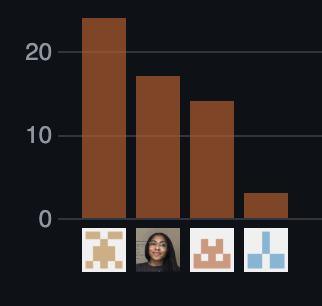